# Chapter 3. Sampling the Imaginary

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as onp
import pandas as pd
from scipy.stats import gaussian_kde

from jax import vmap
import jax.numpy as np
from jax.random import PRNGKey

import numpyro
import numpyro.distributions as dist

%config InlineBackend.figure_formats = ["svg"]
az.style.use("arviz-darkgrid")

### Code 3.1

In [2]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
tmp = Pr_Positive_Vampire * Pr_Vampire
Pr_Positive = tmp + Pr_Positive_Mortal * (1 - Pr_Vampire)
Pr_Vampire_Positive = tmp / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

### Code 3.2

In [3]:
p_grid = np.linspace(start=0, stop=1, num=1000)
prob_p = np.repeat(1, 1000)
prob_data = np.exp(dist.Binomial(total_count=9, probs=p_grid).log_prob(6))
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)

### Code 3.3

In [4]:
samples = p_grid[
    dist.Categorical(probs=posterior).sample(PRNGKey(0), (10000,))]

### Code 3.4

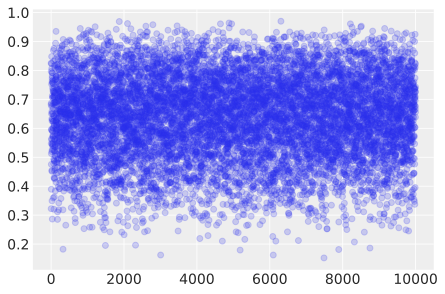

In [5]:
plt.scatter(range(len(samples)), samples, alpha=0.2);

### Code 3.5

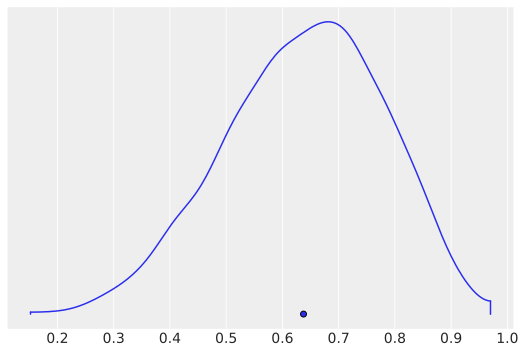

In [6]:
az.plot_density({"": samples}, credible_interval=1);

### Code 3.6

In [7]:
# add up posterior probability where p < 0.5
np.sum(posterior[p_grid < 0.5])

DeviceArray(0.17187458, dtype=float32)

### Code 3.7

In [8]:
np.sum(samples < 0.5) / 1e4

DeviceArray(0.1711, dtype=float32)

### Code 3.8

In [9]:
np.sum((samples > 0.5) & (samples < 0.75)) / 1e4

DeviceArray(0.6025, dtype=float32)

### Code 3.9

In [10]:
np.quantile(samples, 0.8)

DeviceArray(0.7637637, dtype=float32)

### Code 3.10

In [11]:
np.quantile(samples, [0.1, 0.9])

DeviceArray([0.44644645, 0.8168168 ], dtype=float32)

### Code 3.11

In [12]:
p_grid = np.linspace(start=0, stop=1, num=1000)
prior = np.repeat(1, 1000)
likelihood = np.exp(dist.Binomial(total_count=3, probs=p_grid).log_prob(3))
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)
samples = p_grid[
    dist.Categorical(probs=posterior).sample(PRNGKey(0), (10000,))]

### Code 3.12

In [13]:
np.percentile(samples, q=(25, 75))

DeviceArray([0.7077077, 0.9319319], dtype=float32)

### Code 3.13

In [14]:
numpyro.diagnostics.hpdi(samples, prob=0.5)

array([0.8418418, 0.998999 ], dtype=float32)

### Code 3.14

In [15]:
p_grid[np.argmax(posterior)]

DeviceArray(1., dtype=float32)

### Code 3.15

In [16]:
samples[np.argmax(gaussian_kde(samples, bw_method=0.01)(samples))]

DeviceArray(0.988989, dtype=float32)

### Code 3.16

In [17]:
print(np.mean(samples))
print(np.median(samples))

0.8011085
0.8428428


### Code 3.17

In [18]:
np.sum(posterior * np.abs(0.5 - p_grid))

DeviceArray(0.3128752, dtype=float32)

### Code 3.18

In [19]:
loss = vmap(lambda d: np.sum(posterior * np.abs(d - p_grid)))(p_grid)

### Code 3.19

In [20]:
p_grid[np.argmin(loss)]

DeviceArray(0.8408408, dtype=float32)

### Code 3.20

In [21]:
np.exp(dist.Binomial(total_count=2, probs=0.7).log_prob(np.arange(3)))

DeviceArray([0.08999996, 0.42000008, 0.48999974], dtype=float32)

### Code 3.21

In [22]:
dist.Binomial(total_count=2, probs=0.7).sample(PRNGKey(0))

DeviceArray(1., dtype=float32)

### Code 3.22

In [23]:
dist.Binomial(total_count=2, probs=0.7).sample(PRNGKey(2), (10,))

DeviceArray([0., 2., 2., 2., 1., 2., 2., 1., 0., 0.], dtype=float32)

### Code 3.23

In [24]:
dummy_w = dist.Binomial(total_count=2, probs=0.7).sample(PRNGKey(0), (100000,))
onp.unique(dummy_w, return_counts=True)[1] / 1e5

array([0.0883 , 0.42101, 0.49069])

### Code 3.24

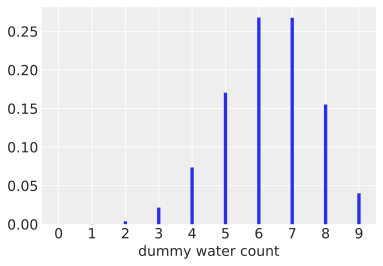

In [25]:
dummy_w = dist.Binomial(total_count=9, probs=0.7).sample(PRNGKey(0), (100000,))
ax = az.plot_dist(dummy_w.copy(), kind='hist', hist_kwargs={"rwidth": 0.1})
ax.set_xlabel("dummy water count", fontsize=14);

### Code 3.25

In [26]:
w = dist.Binomial(total_count=9, probs=0.6).sample(PRNGKey(0), (int(1e4),))

### Code 3.26

In [27]:
w = dist.Binomial(total_count=9, probs=samples).sample(PRNGKey(0))

### Code 3.27

In [28]:
p_grid = np.linspace(start=0, stop=1, num=1000)
prior = np.repeat(1, 1000)
likelihood = np.exp(dist.Binomial(total_count=9, probs=p_grid).log_prob(6))
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)
samples = p_grid[dist.Categorical(posterior).sample(PRNGKey(100), (10000,))]

### Code 3.28

In [29]:
birth1 = [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
          0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
          0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
          0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
          1, 1, 1, 0, 1, 1, 1, 1]
birth2 = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
          1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
          1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
          0, 1, 1, 1, 0, 0, 0, 0]

### Code 3.29

In [30]:
homeworkch3 = pd.read_csv("../data/homeworkch3.csv")

### Code 3.30

In [31]:
sum(birth1) + sum(birth2)

111